In [1]:
%load_ext autoreload
%autoreload 2
from utils import Metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import numpy as np
sns.set_theme()

In [6]:
with open("metrics.pkl", "rb") as f:
    metrics_list = pickle.load(f)

In [7]:
cranfield_metrics, time_metrics = metrics_list['cranfield'], metrics_list['time']

In [8]:
for i,m in enumerate(cranfield_metrics):
    print(f"{m} & {m.MRR:.3f} & {time_metrics[i].MRR:.3f}\\\\")

stemming-bm25f(0.7,1.7) & 0.458 & 0.707\\
stemming-bm25f(0.8,1.5) & 0.448 & 0.709\\
stemming-bm25f(0.8,1.9) & 0.445 & 0.720\\
stemming-bm25f(0.9,1.5) & 0.444 & 0.709\\
stemming-bm25f(0.75,1.2) & 0.443 & 0.695\\
stemming-bm25f(0.4,1.7) & 0.442 & 0.704\\
stemming-bm25f(0.8,1.2) & 0.440 & 0.688\\
stemming-bm25f(0.9,1.2) & 0.431 & 0.700\\
stemming-bm25f(0.5,1.5) & 0.431 & 0.701\\
stemming-bm25f(0.3,2) & 0.425 & 0.665\\
stemming-bm25f(0.2,1.9) & 0.418 & 0.653\\
standard-bm25f(0.4,1.7) & 0.411 & 0.686\\


In [9]:
for i,m in enumerate(cranfield_metrics):
    keys = ["mean", "min", "first_quartile", "median", "third_quartile", "max"]
    strings = list(map(lambda x: f"{m.rps[x]:.3f}", keys))
    strings += list(map(lambda x: f"{time_metrics[i].rps[x]:.3f}", keys))
    print(str(m) + " & " + " & ".join(strings) + "\\\\")

stemming-bm25f(0.7,1.7) & 0.335 & 0.000 & 0.129 & 0.250 & 0.500 & 1.000 & 0.658 & 0.000 & 0.356 & 0.750 & 1.000 & 1.000\\
stemming-bm25f(0.8,1.5) & 0.341 & 0.000 & 0.129 & 0.250 & 0.500 & 1.000 & 0.659 & 0.000 & 0.372 & 0.750 & 1.000 & 1.000\\
stemming-bm25f(0.8,1.9) & 0.339 & 0.000 & 0.106 & 0.250 & 0.500 & 1.000 & 0.663 & 0.000 & 0.356 & 0.789 & 1.000 & 1.000\\
stemming-bm25f(0.9,1.5) & 0.338 & 0.000 & 0.100 & 0.250 & 0.500 & 1.000 & 0.663 & 0.000 & 0.372 & 0.764 & 1.000 & 1.000\\
stemming-bm25f(0.75,1.2) & 0.344 & 0.000 & 0.129 & 0.250 & 0.500 & 1.000 & 0.663 & 0.000 & 0.372 & 0.764 & 1.000 & 1.000\\
stemming-bm25f(0.4,1.7) & 0.332 & 0.000 & 0.070 & 0.250 & 0.500 & 1.000 & 0.676 & 0.000 & 0.372 & 0.800 & 1.000 & 1.000\\
stemming-bm25f(0.8,1.2) & 0.342 & 0.000 & 0.129 & 0.250 & 0.500 & 1.000 & 0.661 & 0.000 & 0.372 & 0.764 & 1.000 & 1.000\\
stemming-bm25f(0.9,1.2) & 0.334 & 0.000 & 0.093 & 0.250 & 0.500 & 1.000 & 0.662 & 0.000 & 0.372 & 0.764 & 1.000 & 1.000\\
stemming-bm25f(0.5,1.5)

In [15]:
sorted_time = sorted(time_metrics, key=lambda x: x.MRR, reverse=True)
[x.MRR for x in sorted_time]

[0.7202083333333333,
 0.7086805555555555,
 0.7085565476190477,
 0.7070833333333334,
 0.7037103174603175,
 0.7005505952380953,
 0.7002579365079364,
 0.6945634920634921,
 0.6878968253968255,
 0.6855902777777778,
 0.6650000000000001,
 0.6527579365079368]

In [16]:
sorted_cranfield = sorted(cranfield_metrics, key=lambda x: x.MRR, reverse=True)
[x.MRR for x in sorted_cranfield]

[0.4576334776334778,
 0.4481204906204907,
 0.44468975468975486,
 0.444318181818182,
 0.4433621933621935,
 0.4420274170274171,
 0.43954184704184707,
 0.43120490620490626,
 0.43067460317460315,
 0.42496031746031754,
 0.41836580086580094,
 0.4109776334776335]

In [17]:
def dataframe_from_metrics(metrics_list):
    top5_metrics = metrics_list[:5]
    k_vals = [1, 3, 5, 10]

    metrics_str = []
    precisions = []
    ncdg = []

    for m in top5_metrics:
        metrics_str += [str(m)]*4
        precisions += m.rp_at_k
        ncdg += m.ndcg_at_k

    df = pd.DataFrame.from_dict({'k': k_vals*5,
                       'metric': metrics_str,
                       'precision': precisions,
                        'ncdg': ncdg})
    
    return df

In [18]:
cranfield_df = dataframe_from_metrics(sorted_cranfield)
time_df = dataframe_from_metrics(sorted_time)

In [89]:
cranfield_df.head()

,k,metric,precision,ncdg
0,1,"stemming-bm25f(0.7,1.7)",0.318182,0.318182
1,3,"stemming-bm25f(0.7,1.7)",0.266667,0.274743
2,5,"stemming-bm25f(0.7,1.7)",0.229091,0.247555
3,10,"stemming-bm25f(0.7,1.7)",0.171818,0.205245
4,1,"stemming-bm25f(0.8,1.5)",0.309091,0.309091


In [124]:
def plot_df(df, ax, ylab, ylim, title, legend_title="Preprocess-scoring"):
    plt.figure(figsize=(10,8))
    df = df.sort_values(["k", ylab], ascending=[True, False]).reset_index()
    scatter = sns.barplot(data=df, ax=ax, x="k", y=ylab, hue="metric")
    sns_plot = scatter.legend(title=legend_title)
    scatter.set(ylim=(0,ylim))

In [136]:
df = cranfield_df
ylab="precision"
df= df.sort_values(["k", ylab], ascending=[True, False]).reset_index()

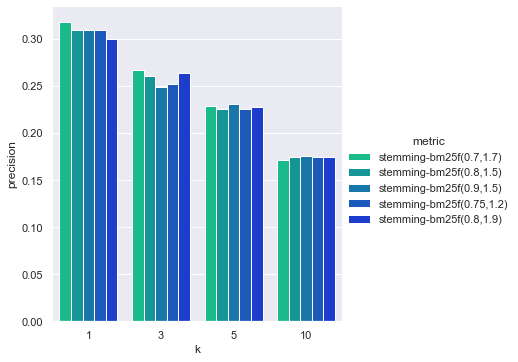

In [150]:
#df[["k","metric","precision"]].plot(x="k", y="precision", kind="bar",)
sns.set_theme()
sns.catplot(data=df, x="k", y="precision", hue="metric", kind="bar", palette="winter_r")

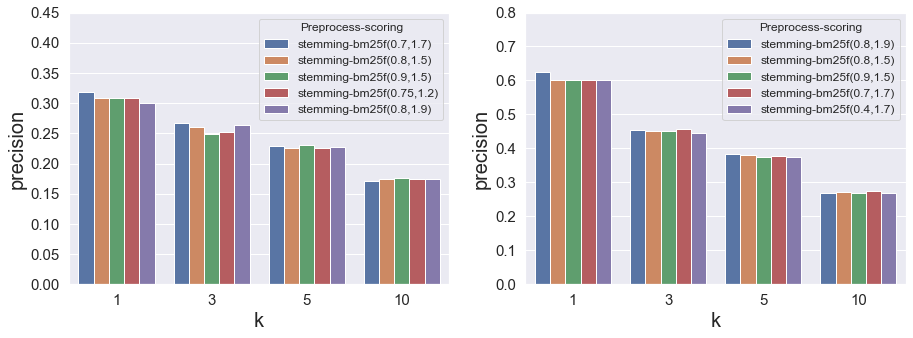

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [149]:
LARGE_SIZE = 20
MEDIUM_SIZE = 15
SMALL_SIZE = 12

plt.rc('axes', labelsize=LARGE_SIZE)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
plot_df(cranfield_df, ax=axes[0], ylim=.45, ylab="precision", title="Precision @ k for Cranfield dataset")
plot_df(time_df, ax=axes[1], ylim=.8, ylab="precision", title="Precision @ k for Time dataset")
# axes[0].set_title("prova", fontsize="Cranfield")
# fig.savefig("p@k.png")

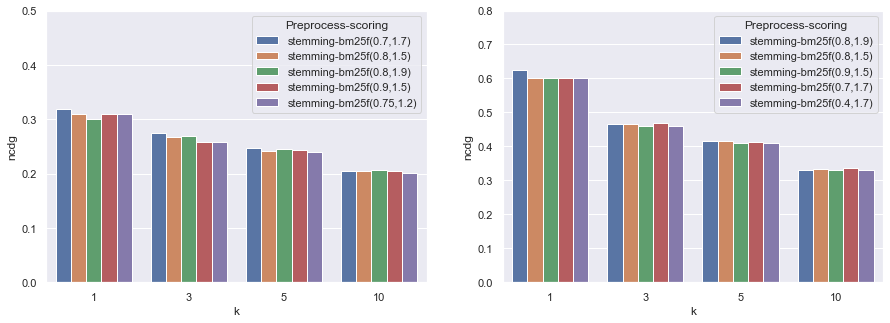

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
plot_df(cranfield_df, ax=axes[0], ylim=.5, ylab="ncdg", title="NCDG @ k for Cranfield dataset")
plot_df(time_df, ax=axes[1], ylim=.8, ylab="ncdg", title="NCDG @ k for Time dataset")

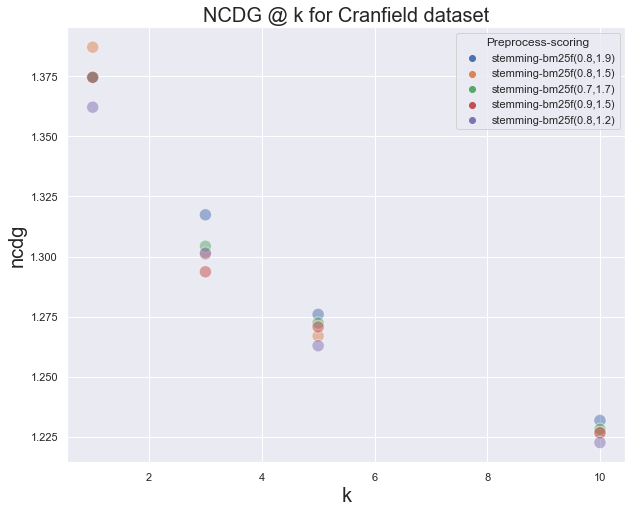

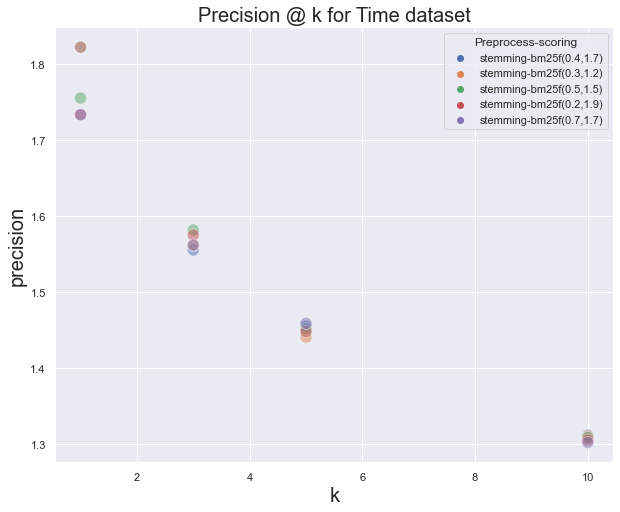

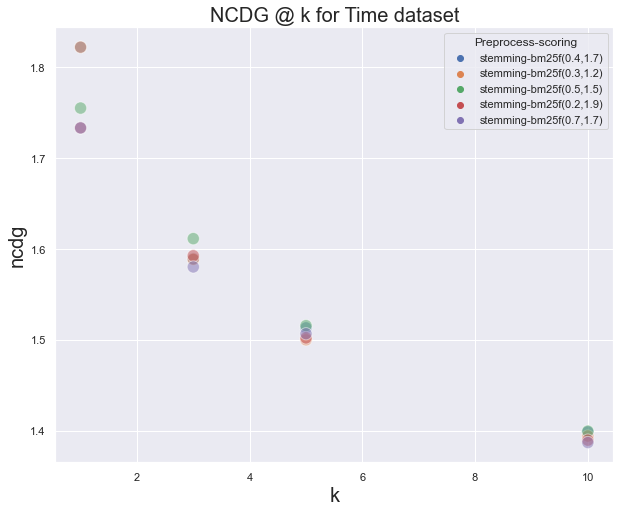

In [130]:
rp_records = [[str(x), x.rps['mean'], x.rps['min'], x.rps['first_quartile']] for x in metrics_list]

In [127]:
pd.DataFrame(rp_records, columns=["Configuration", "Mean", "Min", "1st Quartile"])

,Configuration,Mean,Min,1st Quartile
0,"stemming-bm25f(0.8,1.9)",0.345956,0.0,0.139163
1,"stemming-bm25f(0.8,1.5)",0.344740,0.0,0.128233
2,"stemming-bm25f(0.7,1.7)",0.346508,0.0,0.142857
3,"stemming-bm25f(0.9,1.5)",0.346317,0.0,0.108836
4,"stemming-bm25f(0.8,1.2)",0.335336,0.0,0.108836
5,"stemming-bm25f(0.9,1.2)",0.342522,0.0,0.100862
6,"stemming-bm25f(0.3,1.2)",0.331277,0.0,0.054741
7,"stemming-bm25f(0.4,1.7)",0.330632,0.0,0.069581
8,"stemming-bm25f(0.75,1.2)",0.332785,0.0,0.108836
9,"stemming-bm25f(0.5,1.5)",0.331823,0.0,0.069581
